# Лабка №6 

## Part #1

### Step 0

Run the necessary imports.

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

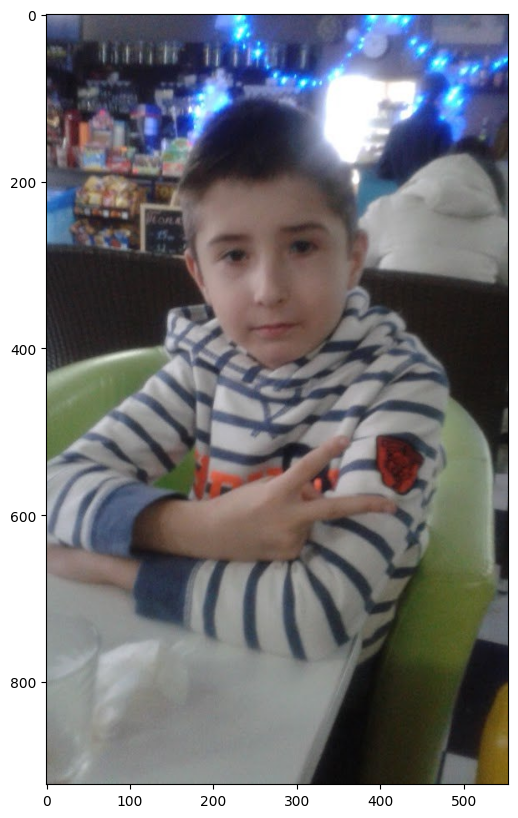

In [2]:
img = cv2.imread('imgs/sasik.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
import dlib

detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

Number of detected faces: 1
rectangles[[(180, 242) (366, 428)]]
<bound method PyCapsule.left of rectangle(180,242,366,428)>


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

180 242 186 186


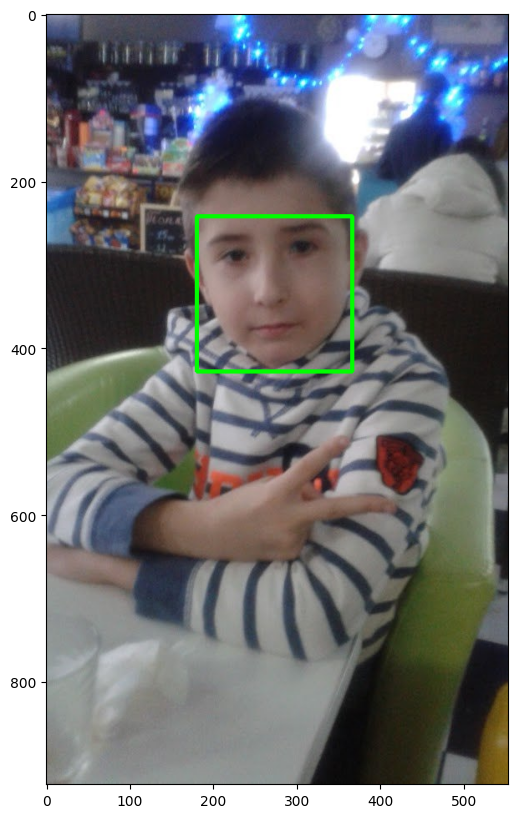

In [5]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    

plt.imshow(result_dlib)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

In [6]:
def detect_face(img_path: str):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    rects = detector(gray, 1)

    print('Number of detected faces:', len(rects))
    print(rects)
    print(rects[0].left)


    # Draw rectangle around each face
    result_dlib = np.copy(img)
    faces_dlib_img = []
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        print(x, y, w, h)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
        faces_dlib_img.append(img[y:y+h, x:x+w, :])
        

    plt.imshow(result_dlib)

Number of detected faces: 8
rectangles[[(170, 65) (213, 108)], [(309, 161) (352, 204)], [(607, 32) (659, 84)], [(383, 67) (435, 118)], [(501, 22) (544, 65)], [(136, 151) (180, 194)], [(12, 60) (55, 103)], [(492, 130) (544, 182)]]
<bound method PyCapsule.left of rectangle(170,65,213,108)>
170 65 43 43
309 161 43 43
607 32 52 52
383 67 52 51
501 22 43 43
136 151 44 43
12 60 43 43
492 130 52 52


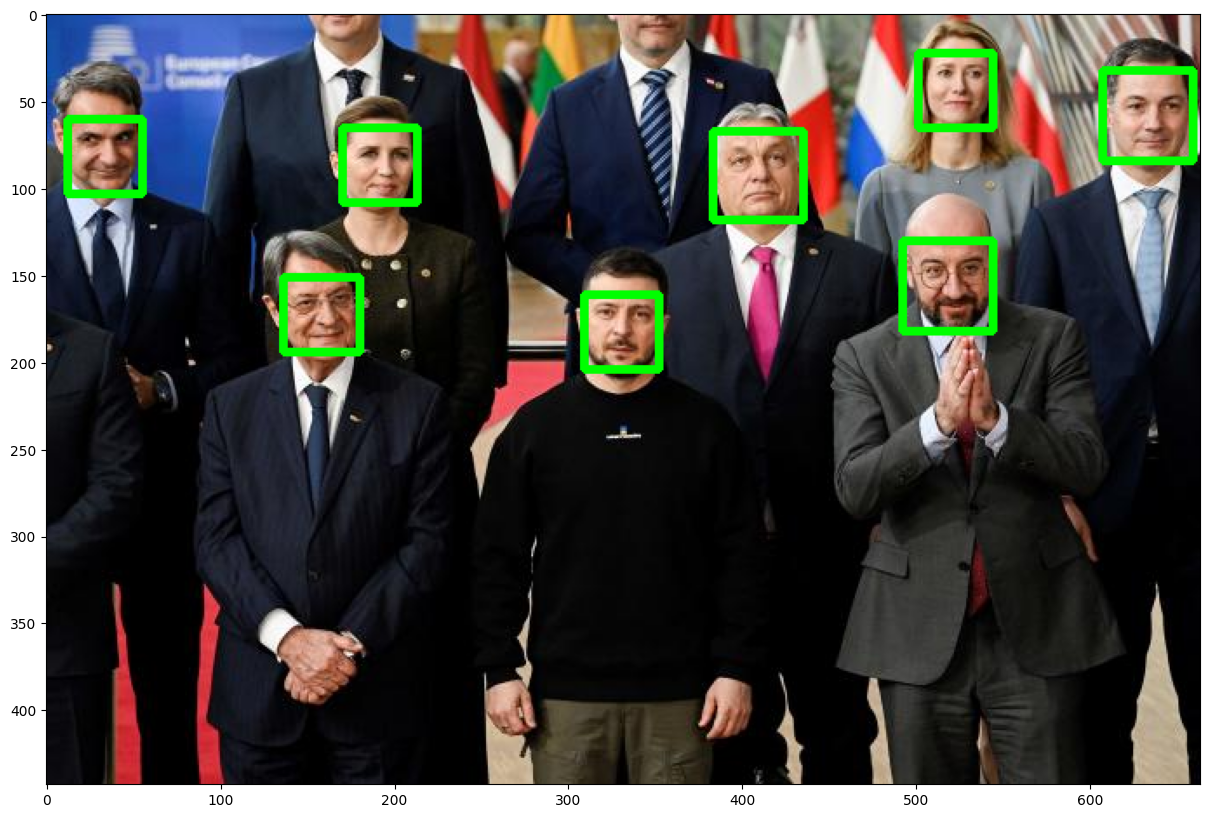

In [7]:
detect_face("imgs/eu_summit.jpg")

Number of detected faces: 2
rectangles[[(629, 295) (736, 402)], [(223, 104) (330, 211)]]
<bound method PyCapsule.left of rectangle(629,295,736,402)>
629 295 107 107
223 104 107 107


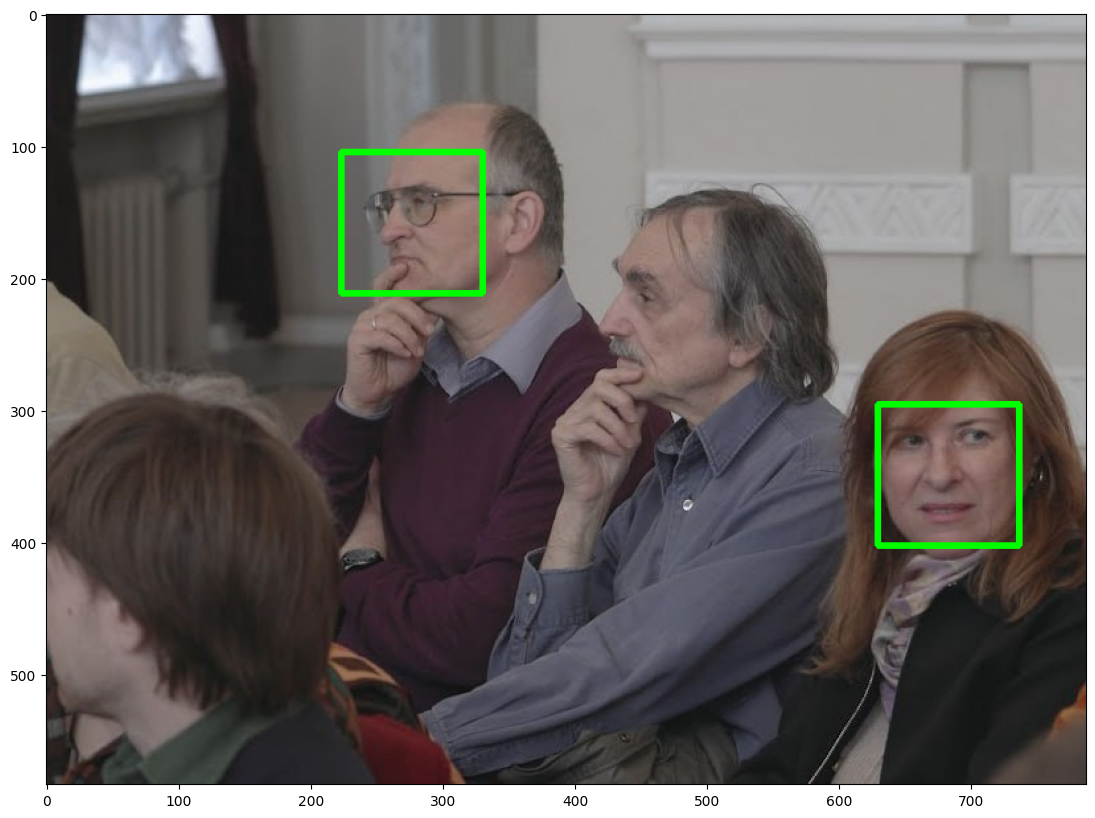

In [8]:
detect_face("imgs/people.jpg")

## Part #2
In this homework, you are going to use and compare two different trackers (of your liking) and compare the results.

### Step 1
Decide what video you are going to use for this homework, select an object and generate the template. You can use any video you want (your own, from Youtube, etc.)
and track any object you want (e.g. a car, a pedestrian, etc.).

In [9]:
video = cv2.VideoCapture('imgs/capybara.mp4')

NUM_FRAMES_TO_TRACK = 15

### Step 2
Initialize a tracker (e.g. KCF).

In [10]:
tracker = cv2.TrackerKCF_create()

### Step 3
Run the tracker on the video and the selected object. Run the tracker for around 10-15 frames.

In [11]:
# Читаємо перший кадр, щоб вибрати ROI
ret, first_frame = video.read()

print("Виберіть об'єкт для відстеження у вікні та натисніть ENTER...")
global_bbox = cv2.selectROI("Select Object to Track", first_frame, False)
bbox = global_bbox
tracker.init(first_frame, bbox)

Виберіть об'єкт для відстеження у вікні та натисніть ENTER...


### Step 4
For each frame, print the bounding box on the image and save it.

In [12]:
# Підготуємо папку для результатів KCF
os.makedirs("result_KCF", exist_ok=True)

frame_count = 0
while frame_count < NUM_FRAMES_TO_TRACK:
    print(f"KCF: processing frame {frame_count}")
    # Крок 3: Запуск трекера на відео
    ret, frame = video.read()
    if not ret:
        print("Закінчилися кадри у відео.")
        break

    # Оновлюємо трекер
    (success, bbox) = tracker.update(frame)

    # Крок 4: Друк обмежувальної рамки на зображенні та збереження
    if success:
        (x, y, w, h) = [int(v) for v in bbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        status_text = "Success"
        color = (0, 255, 0)
    else:
        status_text = "Failure"
        color = (0, 0, 255)

    # Додаємо текст на кадр
    cv2.putText(frame, "KCF", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame, f"Frame: {frame_count + 1}", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame, f"Status: {status_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Зберігаємо кадр
    output_filename = os.path.join("result_KCF", f"frame_{frame_count:04d}.jpg")
    ok = cv2.imwrite(output_filename, frame)
    if not ok:
        print(f"[ERROR] Failed to write {output_filename}")
    else:
        print(f"Saved {os.path.abspath(output_filename)}")

    frame_count += 1

video.release()
cv2.destroyAllWindows()

KCF: processing frame 0
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0000.jpg
KCF: processing frame 1
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0001.jpg
KCF: processing frame 2
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0002.jpg
KCF: processing frame 3
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0003.jpg
KCF: processing frame 4
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0004.jpg
KCF: processing frame 5
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0005.jpg
KCF: processing frame 6
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0006.jpg
KCF: processing frame 7
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0007.jpg
KCF: processing frame 8
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0008.jpg
KCF: processing frame 9
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0009.jpg
KCF: processing frame 10
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0010.jpg
KCF: processing frame 11
Saved c:\UnProg\MMROKZ\lab 6\result_KCF\frame_0011.jpg
KCF: processing frame 12
Saved c:\UnProg\MMROKZ\la

### Step 5
Select a different tracker (e.g. CSRT) and repeat steps 2, 3 and 4.

In [13]:
video = cv2.VideoCapture('imgs/capybara.mp4')
tracker = cv2.TrackerCSRT_create()
print(global_bbox)
bbox = global_bbox
ret, first_frame = video.read()
tracker.init(first_frame, bbox)

(476, 809, 133, 167)


In [14]:
# Підготуємо папку для результатів CSRT
os.makedirs("result_CSRT", exist_ok=True)

frame_count = 0
while frame_count < NUM_FRAMES_TO_TRACK:
    print(f"CSRT: processing frame {frame_count}")
    # Крок 3: Запуск трекера на відео
    ret, frame = video.read()
    if not ret:
        print("Закінчилися кадри у відео.")
        break

    # Оновлюємо трекер
    (success, bbox) = tracker.update(frame)

    # Крок 4: Друк обмежувальної рамки на зображенні та збереження
    if success:
        (x, y, w, h) = [int(v) for v in bbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        status_text = "Success"
        color = (0, 255, 0)
    else:
        status_text = "Failure"
        color = (0, 0, 255)

    # Додаємо текст на кадр
    cv2.putText(frame, "CSRT", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame, f"Frame: {frame_count + 1}", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.putText(frame, f"Status: {status_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Зберігаємо кадр
    output_filename = os.path.join("result_CSRT", f"frame_{frame_count:04d}.jpg")
    ok = cv2.imwrite(output_filename, frame)
    if not ok:
        print(f"[ERROR] Failed to write {output_filename}")
    else:
        print(f"Saved {os.path.abspath(output_filename)}")

    frame_count += 1

video.release()
cv2.destroyAllWindows()

CSRT: processing frame 0
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0000.jpg
CSRT: processing frame 1
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0001.jpg
CSRT: processing frame 2
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0002.jpg
CSRT: processing frame 3
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0003.jpg
CSRT: processing frame 4
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0004.jpg
CSRT: processing frame 5
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0005.jpg
CSRT: processing frame 6
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0006.jpg
CSRT: processing frame 7
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0007.jpg
CSRT: processing frame 8
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0008.jpg
CSRT: processing frame 9
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0009.jpg
CSRT: processing frame 10
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0010.jpg
CSRT: processing frame 11
Saved c:\UnProg\MMROKZ\lab 6\result_CSRT\frame_0011.jpg
CSRT: processing frame 12


### Step 6
Compare the results:
* Do you see any differences? If so, what are they?

Так, є різниця: KCF після 4 кадру "загубилася" і не може знайти відстежуваний об'єкт, в той же час CSRT до кінця відстежує бажаний об'єкт.

* Does one tracker perform better than the other? In what way?

Так, CSRT визначає більш детально об'єкт, але є повілнішим за KCF приблизно в 5 разів.